In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('sonar.all-data.csv')
df=pd.DataFrame(data=df)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [5]:
df.shape

(208, 61)

In [6]:
df['60'].unique()

array(['R', 'M'], dtype=object)

In [7]:
df['60'].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()
df['60']=le.fit_transform(df['60'])
df['60']

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: 60, Length: 208, dtype: int32

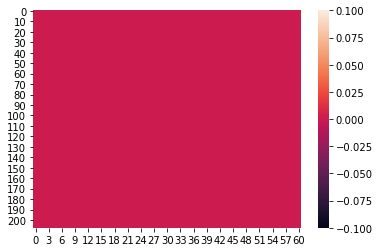

In [10]:
sns.heatmap(df.isnull())

In [11]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(208, 61)
(168, 61)


In [12]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1


In [13]:
x=df_new.iloc[:,0:-1]
x.shape

(168, 60)

In [16]:
y=pd.DataFrame(df_new['60'])


In [17]:
from sklearn.decomposition import PCA

pca=PCA(n_components=10)

In [18]:
x=pca.fit_transform(x)
x.shape

(168, 10)

In [19]:
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8,9
0,0.538755,0.550862,-0.315819,0.342100,0.206413,0.098454,0.442978,-0.390373,-0.028273,-0.232856
1,-1.094612,0.922251,0.779147,-0.479970,0.116465,0.367385,-0.142330,-0.332527,0.224608,-0.255447
2,-0.060613,0.294423,0.590967,-0.439526,0.142214,0.288649,0.161305,0.087322,0.472598,-0.211632
3,-0.220735,0.464541,-0.170272,0.255457,0.278509,0.177397,-0.155218,0.535461,0.528404,0.199699
4,-0.566242,-0.115173,0.058064,0.488738,0.491112,0.032908,0.053740,-0.318633,-0.127178,-0.119009
...,...,...,...,...,...,...,...,...,...,...
163,0.280137,-0.876915,0.230501,-0.042187,-0.030130,0.132981,-0.211637,0.042976,0.270238,0.028919
164,0.487771,-0.925079,0.149447,-0.133602,-0.193977,0.059912,-0.303450,-0.042003,0.280329,0.071218
165,0.563699,-0.908659,0.211525,-0.041595,-0.227210,0.113086,-0.250079,-0.022774,0.325442,0.166380
166,0.179989,-0.876397,0.202832,0.105719,-0.032878,-0.016952,-0.066085,-0.010339,0.243250,0.194618


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc=StandardScaler()

In [22]:
x=sc.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9
0,0.736679,1.022994,-0.802573,1.100003,0.723739,0.370750,1.795901,-2.107942,-0.160615,-1.386682
1,-1.496742,1.712694,1.979999,-1.543313,0.408359,1.383475,-0.577027,-1.795587,1.275971,-1.521212
2,-0.082881,0.546767,1.501789,-1.413268,0.498639,1.086976,0.653956,0.471525,2.684767,-1.260294
3,-0.301827,0.862689,-0.432701,0.821407,0.976527,0.668032,-0.629276,2.891393,3.001796,1.189231
4,-0.774264,-0.213886,0.147553,1.571506,1.721971,0.123922,0.217870,-1.720563,-0.722483,-0.708713
...,...,...,...,...,...,...,...,...,...,...
163,0.383052,-1.628502,0.585757,-0.135649,-0.105645,0.500771,-0.858008,0.232061,1.535187,0.172216
164,0.666964,-1.717945,0.379780,-0.429591,-0.680135,0.225614,-1.230231,-0.226806,1.592514,0.424110
165,0.770787,-1.687452,0.537537,-0.133747,-0.796660,0.425851,-1.013856,-0.122973,1.848797,0.990811
166,0.246112,-1.627539,0.515444,0.339934,-0.115280,-0.063837,-0.267919,-0.055829,1.381873,1.158973


In [23]:
x.skew()

0    0.054957
1    0.431867
2    0.163338
3    0.014475
4    0.325498
5    0.328969
6    0.261947
7    0.149247
8    0.509282
9   -0.109020
dtype: float64

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [25]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (126, 10)
x_test_shape: (42, 10)
y_train_shape: (126, 1)
y_test_shape: (42, 1)


In [26]:
#logistic Regression

lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predlg))
print('\n')
print(confusion_matrix(y_test,predlg))
print('\n')
print(classification_report(y_test,predlg))

accuracy_score: 0.9047619047619048


[[18  2]
 [ 2 20]]


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.91      0.91      0.91        22

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [27]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'criterion': 'gini'}


In [32]:
#decisiontreeclassifier

dtc=DecisionTreeClassifier('gini')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,preddtc))
print('\n')
print(confusion_matrix(y_test,preddtc))
print('\n')
print(classification_report(y_test,preddtc))

accuracy_score: 0.8095238095238095


[[17  3]
 [ 5 17]]


              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.85      0.77      0.81        22

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



In [33]:
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)


print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [34]:
#svc

svc=SVC(kernel='linear',C=10)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predsvc))
print('\n')
print(confusion_matrix(y_test,predsvc))
print('\n')
print(classification_report(y_test,predsvc))

accuracy_score: 0.9047619047619048


[[18  2]
 [ 2 20]]


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.91      0.91      0.91        22

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [35]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predknn))
print('\n')
print(confusion_matrix(y_test,predknn))
print('\n')
print(classification_report(y_test,predknn))

accuracy_score: 0.8333333333333334


[[18  2]
 [ 5 17]]


              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.89      0.77      0.83        22

    accuracy                           0.83        42
   macro avg       0.84      0.84      0.83        42
weighted avg       0.84      0.83      0.83        42



In [36]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predgnb))
print('\n')
print(confusion_matrix(y_test,predgnb))
print('\n')
print(classification_report(y_test,predgnb))

accuracy_score: 0.8571428571428571


[[16  4]
 [ 2 20]]


              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.83      0.91      0.87        22

    accuracy                           0.86        42
   macro avg       0.86      0.85      0.86        42
weighted avg       0.86      0.86      0.86        42



In [37]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=50,random_state=42)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf,labels=[0,1]))

0.8571428571428571
[[17  3]
 [ 3 19]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.86      0.86      0.86        22

    accuracy                           0.86        42
   macro avg       0.86      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42



In [38]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9285714285714286
[[18  2]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.91      0.95      0.93        22

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



In [41]:
dtcpred_prob=dtc.predict_proba(x_test)[:,1]
knnpred_prob=knn.predict_proba(x_test)[:,1]
lgpred_prob=lg.predict_proba(x_test)[:,1]
rfpred_prob=rf.predict_proba(x_test)[:,1]
adpred_prob=ad.predict_proba(x_test)[:,1]
gnbpred_prob=gnb.predict_proba(x_test)[:,1]
                                    

In [42]:
from sklearn.metrics import roc_curve
dtc_tpr,dtc_fpr,dtc_thresholds=roc_curve(y_test,dtcpred_prob)
knn_tpr,knn_fpr,knn_thresholds=roc_curve(y_test,knnpred_prob)
lg_tpr,lg_fpr,lg_thresholds=roc_curve(y_test,lgpred_prob)
rf_tpr,rf_fpr,rf_threshold=roc_curve(y_test,rfpred_prob)
ad_tpr,ad_fpr,ad_threshold=roc_curve(y_test,adpred_prob)
gnb_tpr,gnb_fpr,gnb_threshold=roc_curve(y_test,gnbpred_prob)

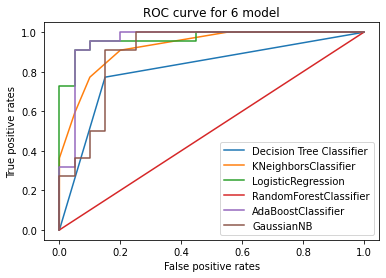

In [43]:
plt.plot(dtc_tpr,dtc_fpr,label ='Decision Tree Classifier')
plt.plot(knn_tpr,knn_fpr,label='KNeighborsClassifier')
plt.plot(lg_tpr,lg_fpr,label='LogisticRegression')
plt.plot(rf_tpr,rf_tpr,label='RandomForestClassifier')
plt.plot(ad_tpr,ad_fpr,label='AdaBoostClassifier')
plt.plot(gnb_tpr,gnb_fpr,label='GaussianNB')

plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('ROC curve for 6 model')
plt.legend(loc='best')
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score
print('DTC AUC SCORE',roc_auc_score(y_test,dtcpred_prob))
print('KNN auc score',roc_auc_score(y_test,knnpred_prob))
print('logisctic regression auc score',roc_auc_score(y_test,lgpred_prob))
print('Random forest classifier',roc_auc_score(y_test,rfpred_prob))
print('adaboost classifier',roc_auc_score(y_test,adpred_prob))
print('Gaussian NB',roc_auc_score(y_test,gnbpred_prob))

DTC AUC SCORE 0.8113636363636364
KNN auc score 0.9261363636363636
logisctic regression auc score 0.965909090909091
Random forest classifier 0.9511363636363637
adaboost classifier 0.9568181818181819
Gaussian NB 0.8977272727272727


In [ ]:
Higher the auc,better the model is working

